In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from PIL import Image
# Imports the Image class from the PIL (Python Imaging Library) module. 
# PIL is used for opening, manipulating, and saving image files.



In [2]:
D= xr.open_dataset('MET254_data.nc')
D

<xarray.Dataset>
Dimensions:    (time: 47482, bnds: 2, longitude: 23, latitude: 37)
Coordinates:
  * time       (time) datetime64[ns] 1971-01-01T12:00:00 ... 2100-12-31T12:00:00
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tas        (time, latitude, longitude) float32 ...
    rain       (time, latitude, longitude) float32 ...
Attributes: (12/34)
    CDI:                            Climate Data Interface version 1.9.9rc1 (...
    Conventions:                    CF-1.4
    history:                        Tue Jul 25 18:04:51 2023: cdo merge tta1....
    institute_id:                   GERICS
    experiment_id:                  historical
    model_id:                       GERICS-REMO2015
    ...                             ...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/90ca7c65-56c6-4bff-9f93-8ce8...
    CDO:                            Climate Data Operators version 1.9.9rc1 (...

In [11]:
var =D['tas']
var

<xarray.DataArray 'tas' (time: 47482, latitude: 37, longitude: 23)>
[40407182 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1971-01-01T12:00:00 ... 2100-12-31T12:00:00
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 2.0
Attributes:
    units:    degC

In [3]:
t =D.rain
t

<xarray.DataArray 'rain' (time: 47482, latitude: 37, longitude: 23)>
[40407182 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1971-01-01T12:00:00 ... 2100-12-31T12:00:00
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 2.0
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             mm/day
    comment:           at surface; includes both liquid and solid phases from...
    original_name:     pr
    original_units:    kg m-2 h-1
    history:           2019-03-28T19:13:27Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_histor...

In [4]:
rain_2010 = t.sel(time=slice('2010-01-01', '2010-12-31'))
rain_2024 = t.sel(time=slice('2024-01-01', '2024-12-31'))
rain_2050 = t.sel(time=slice('2050-01-01', '2050-12-31'))

In [5]:
# Select September from all the 3 years and plot for day, hourly
M_rain = t.sel(time=slice('2010-09-01', '2010-09-30'))
D_rain = M_rain.resample(time='D').mean('time').dropna('time')
D_rain

<xarray.DataArray 'rain' (time: 30, latitude: 37, longitude: 23)>
array([[[1.67988867e-01, 9.18678939e-02, 4.01842594e-01, ...,
         3.44428015e+00, 1.10583019e+00, 1.27069997e-02],
        [1.14522135e+00, 1.25280872e-01, 2.90537059e-01, ...,
         1.82565272e+00, 3.52033764e-01, 2.03139912e-02],
        [9.46901083e-01, 5.61081111e-01, 1.66396797e-01, ...,
         1.52457511e+00, 1.41103983e+00, 7.10346818e-01],
        ...,
        [1.68839550e+01, 2.50488019e+00, 6.02015495e+00, ...,
         1.64684653e-01, 1.17170252e-01, 7.81960711e-02],
        [1.46903715e+01, 1.13932314e+01, 1.59849586e+01, ...,
         1.21769533e-01, 9.98323336e-02, 8.46095756e-02],
        [1.00652590e+01, 2.36625824e+01, 1.84828224e+01, ...,
         9.94237810e-02, 3.24244611e-02, 9.88504663e-02]],

       [[1.24503679e+01, 2.53297215e+01, 3.31189079e+01, ...,
         1.75790942e+00, 1.69835913e+00, 1.02396071e+00],
        [2.14355049e+01, 1.06966934e+01, 8.78761482e+00, ...,
         4.81769180e+00, 1.85384369e+00, 1.14443636e+00],
        [1.19724607e+01, 1.56009111e+01, 1.14137440e+01, ...,
         2.61372066e+00, 9.98313129e-01, 8.29653561e-01],
...
        [1.58001823e+01, 1.88216686e+01, 2.99733086e+01, ...,
         1.92309532e+01, 9.12790298e+00, 2.13014603e+01],
        [2.15137482e+01, 2.22817116e+01, 3.05887470e+01, ...,
         6.96369648e+00, 3.64906335e+00, 7.66490126e+00],
        [2.42184315e+01, 3.11393433e+01, 3.24866791e+01, ...,
         1.13209867e+01, 6.37961531e+00, 4.21684170e+00]],

       [[1.28083029e+01, 1.45204449e+01, 3.14036751e+01, ...,
         3.13338494e+00, 1.39168870e+00, 6.76542163e-01],
        [2.34128451e+00, 2.88213897e+00, 2.95439744e+00, ...,
         2.75913477e+00, 2.03643513e+00, 1.34560072e+00],
        [1.83209789e+00, 1.59837162e+00, 9.49336052e-01, ...,
         2.24996662e+00, 2.12058187e+00, 1.20809722e+00],
        ...,
        [1.82045879e+01, 1.69779301e+01, 3.46288414e+01, ...,
         9.16613674e+00, 3.29440880e+00, 1.03740797e+01],
        [2.96558895e+01, 2.92142429e+01, 2.56570683e+01, ...,
         1.04335957e+01, 2.68416405e+00, 7.89589214e+00],
        [2.15221043e+01, 2.40149403e+01, 2.96143227e+01, ...,
         8.86261177e+00, 5.90200043e+00, 5.51354456e+00]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2010-09-01 2010-09-02 ... 2010-09-30
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 2.0

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
rain_2024

<xarray.DataArray 'rain' (time: 366, latitude: 37, longitude: 23)>
[311466 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2024-01-01T12:00:00 ... 2024-12-31T12:00:00
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 2.0
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             mm/day
    comment:           at surface; includes both liquid and solid phases from...
    original_name:     pr
    original_units:    kg m-2 h-1
    history:           2019-03-28T19:13:27Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_histor...

In [8]:
# Resample to monthly data
month_2010 = rain_2010.resample(time='M').mean()
month_2024 = rain_2024.resample(time='M').mean()
month_2050 = rain_2050.resample(time='M').mean()

In [9]:
month_2050

<xarray.DataArray 'rain' (time: 12, latitude: 37, longitude: 23)>
array([[[1.82061583e-01, 2.18086168e-01, 1.85463175e-01, ...,
         1.09962765e-02, 7.70370709e-03, 9.19113401e-03],
        [1.14744335e-01, 1.06110923e-01, 6.94191083e-02, ...,
         1.20475022e-02, 9.40427929e-03, 1.34691522e-02],
        [3.12320024e-01, 7.43641183e-02, 8.01101848e-02, ...,
         5.92142716e-03, 4.53506270e-03, 4.07055160e-03],
        ...,
        [2.78342172e-09, 2.74935497e-09, 2.64827649e-09, ...,
         2.95446267e-09, 2.76364953e-09, 3.39716988e-09],
        [2.43501130e-09, 2.98876235e-09, 3.46846618e-09, ...,
         2.65307531e-09, 2.73042566e-09, 3.26740968e-09],
        [1.95275551e-09, 2.22006924e-09, 2.82017876e-09, ...,
         2.84131119e-09, 2.91095814e-09, 2.95543812e-09]],

       [[4.68040444e-02, 4.96901199e-02, 7.70098940e-02, ...,
         5.20631811e-03, 5.04283234e-03, 4.41080611e-03],
        [1.66401461e-01, 1.41315684e-01, 1.23207130e-01, ...,
         5.80281112e-03, 6.01495337e-03, 6.31526252e-03],
        [1.13851450e-01, 6.38136417e-02, 5.19242063e-02, ...,
         7.39675714e-03, 9.87108704e-03, 9.80793498e-03],
...
        [9.76200029e-03, 9.46879294e-03, 1.05427159e-02, ...,
         8.52594021e-05, 1.26334286e-04, 2.73437036e-04],
        [2.14317767e-03, 4.22514789e-03, 8.21422972e-03, ...,
         5.09365113e-04, 1.27164967e-04, 4.40672447e-04],
        [2.90336640e-04, 3.77159595e-04, 4.36956482e-03, ...,
         2.94095778e-04, 1.62105789e-04, 5.52365309e-05]],

       [[7.83872902e-02, 1.05692586e-02, 2.67221313e-02, ...,
         3.36752124e-02, 4.40675020e-02, 9.14394408e-02],
        [6.32467121e-02, 1.08314224e-01, 5.06141447e-02, ...,
         4.75960150e-02, 3.70972864e-02, 4.41654213e-02],
        [5.79214357e-02, 1.53363049e-01, 2.37758353e-01, ...,
         1.94899872e-01, 1.98302224e-01, 1.42482176e-01],
        ...,
        [5.14847631e-09, 4.98393282e-09, 4.85620477e-09, ...,
         4.13277013e-09, 3.91179711e-09, 4.01988709e-09],
        [5.05023090e-09, 4.96609864e-09, 5.75297010e-09, ...,
         4.58351579e-09, 3.85315513e-09, 3.64701447e-09],
        [5.03465669e-09, 4.93193220e-09, 4.93084285e-09, ...,
         4.25537339e-09, 4.78587436e-09, 4.41877201e-09]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2050-01-31 2050-02-28 ... 2050-12-31
  * longitude  (longitude) float32 -3.41 -3.19 -2.97 -2.75 ... 0.99 1.21 1.43
  * latitude   (latitude) float32 4.51 4.73 4.95 5.17 ... 11.99 12.21 12.43
    height     float64 2.0

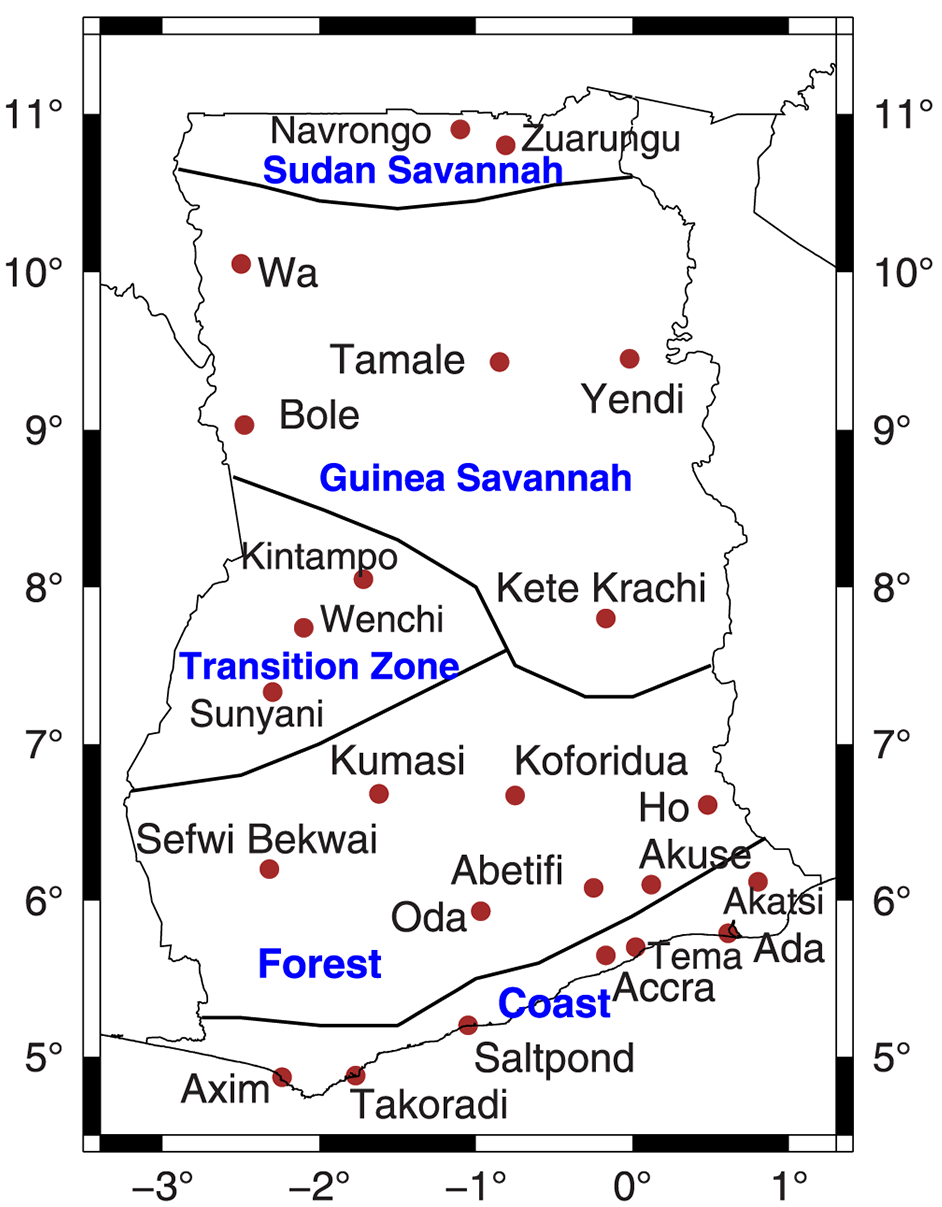

In [10]:
# Image source : https://journals.plos.org/climate/article/figure?id=10.1371/journal.pclm.0000023.g005
image = Image.open('Agroclimatic.png')
image

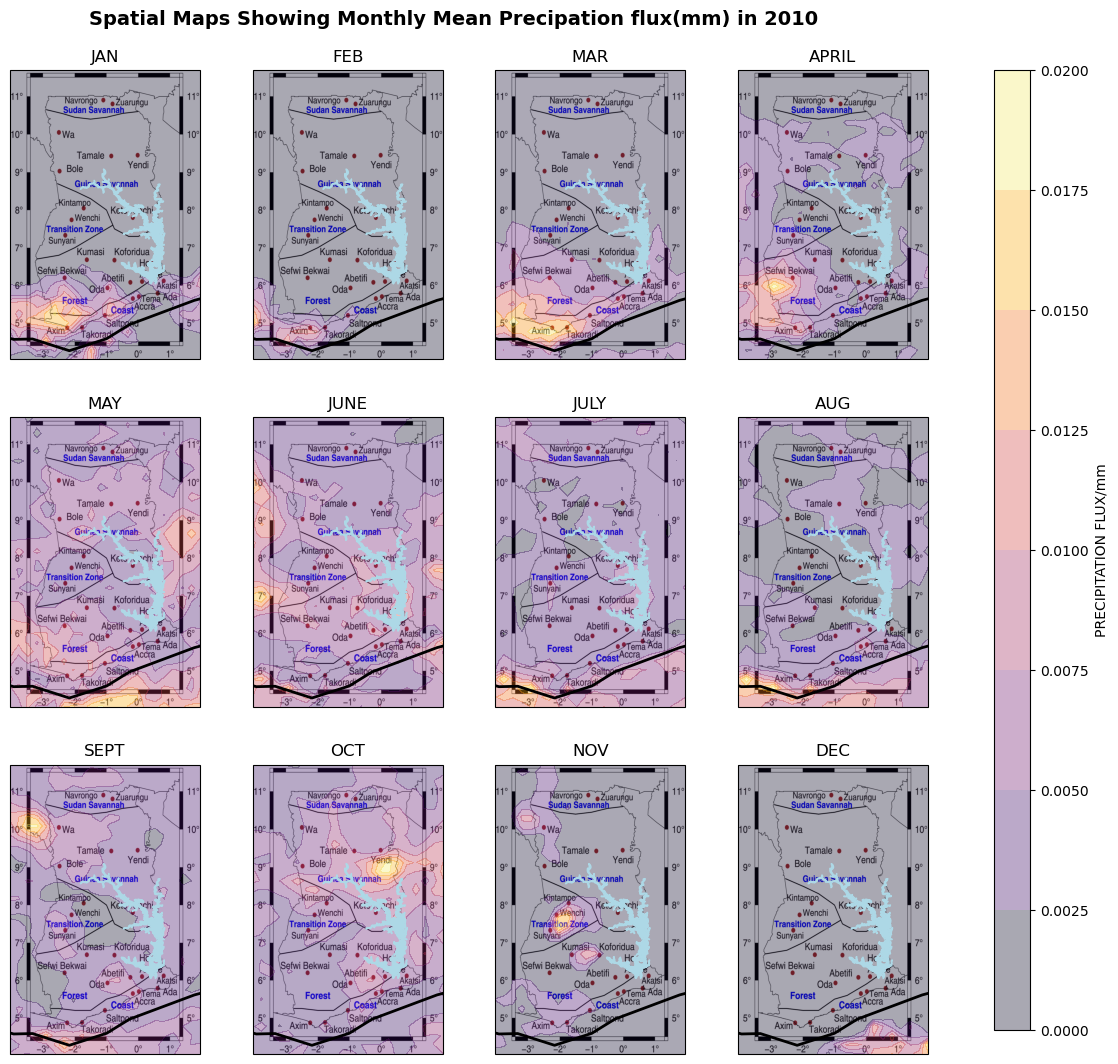

In [15]:
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
month_names = ['JAN','FEB','MAR','APRIL','MAY','JUNE','JULY','AUG','SEPT','OCT','NOV','DEC']
for i in range(12):
    ax[i].imshow(image, extent=[-3.4,1.2,4.5,11.5], transform=ccrs.PlateCarree())
    #      Plots the background image (loaded from Agroclimatic.png) onto the 'i'th subplot.
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    #rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    #ax[i].add_feature(rivers)

    ax[i].set_extent([-3.4, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])

    cb = ax[i].contourf(month_2010.longitude , month_2010.latitude ,month_2010[i], 
                        transform=ccrs.PlateCarree(),cmap='inferno', alpha=0.35)

cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])  
fig.colorbar(cb, cax=cbar_kwargs, label='PRECIPITATION FLUX/mm')
fig.subplots_adjust(wspace=0.2, top=0.93)

fig.suptitle('Spatial Maps Showing Monthly Mean Precipation flux(mm) in 2010', 
             fontsize=14,y=0.98,fontweight='bold')

fig.savefig('2010_rain.png', dpi=1200, bbox_inches='tight')
plt.show()

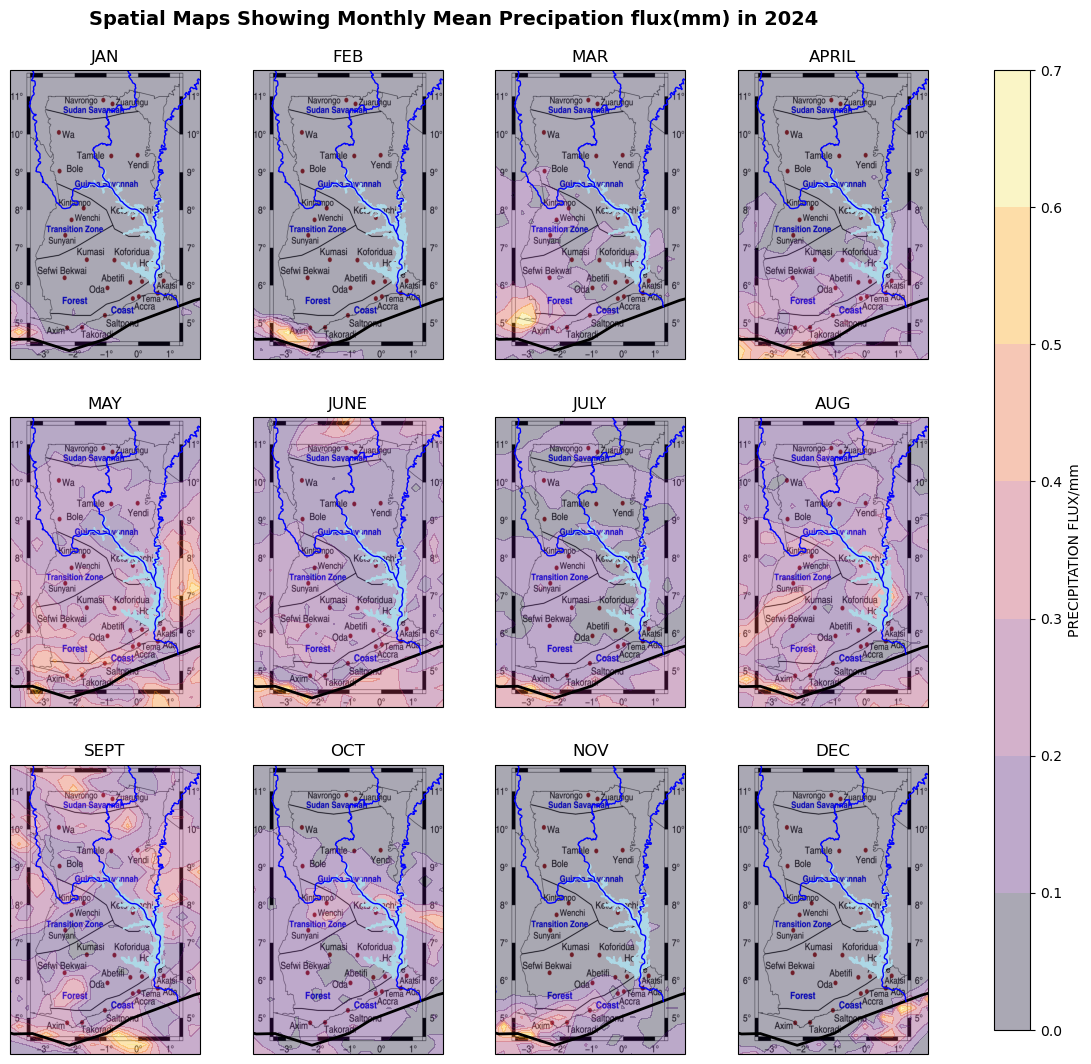

In [16]:
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
month_names = ['JAN','FEB','MAR','APRIL','MAY','JUNE','JULY','AUG','SEPT','OCT','NOV','DEC']
for i in range(12):
    ax[i].imshow(image, extent=[-3.4,1.2,4.5,11.5], transform=ccrs.PlateCarree())
    #      Plots the background image (loaded from Agroclimatic.png) onto the 'i'th subplot.
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='b', facecolor='none')
    ax[i].add_feature(rivers)

    ax[i].set_extent([-3.4, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])

    cb = ax[i].contourf(month_2024.longitude , month_2024.latitude ,month_2024[i], 
                        transform=ccrs.PlateCarree(),cmap='inferno', alpha=0.35)

cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])  
fig.colorbar(cb, cax=cbar_kwargs, label='PRECIPITATION FLUX/mm')
fig.subplots_adjust(wspace=0.2, top=0.93)

fig.suptitle('Spatial Maps Showing Monthly Mean Precipation flux(mm) in 2024', 
             fontsize=14,y=0.98,fontweight='bold')

fig.savefig('2024_rain.png', dpi=1200, bbox_inches='tight')

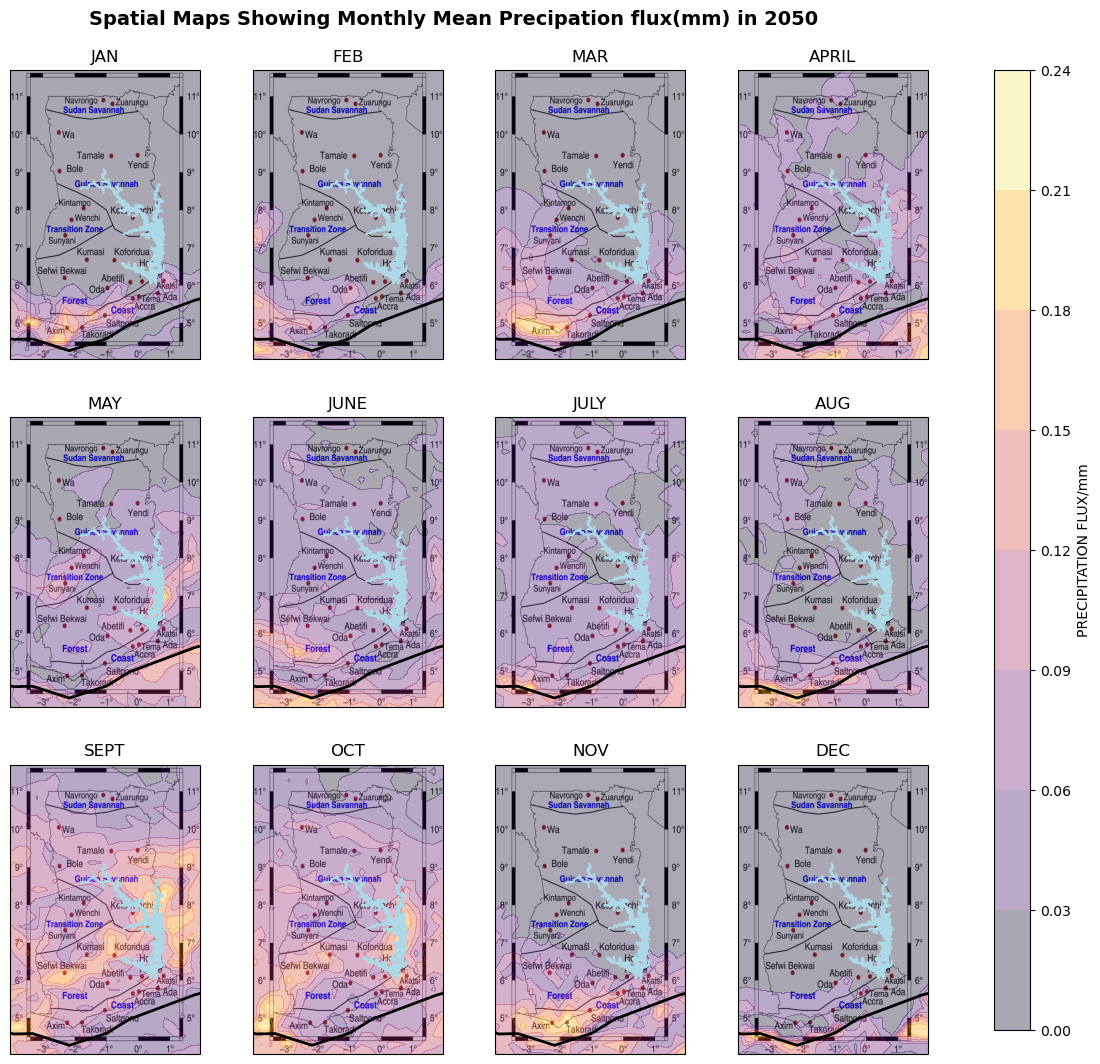

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
# Converts the 2D array of subplots into a 1D array, making it easier to iterate over and manage all subplots.
month_names = ['JAN','FEB','MAR','APRIL','MAY','JUNE','JULY','AUG','SEPT','OCT','NOV','DEC']
for i in range(12):
    ax[i].imshow(image, extent=[-3.4,1.2,4.5,11.5], transform=ccrs.PlateCarree())
    #      Plots the background image (loaded from Agroclimatic.png) onto the 'i'th subplot.
    
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='lightblue')
    #rivers = NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='g', facecolor='none')
    #ax[i].add_feature(rivers)

    ax[i].set_extent([-3.4, 1.2, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])

    cb = ax[i].contourf(month_2050.longitude , month_2050.latitude ,month_2050[i], 
                        transform=ccrs.PlateCarree(),cmap='inferno', alpha=0.35)

cbar_kwargs = fig.add_axes([0.95, 0.13, 0.03, 0.8])  
fig.colorbar(cb, cax=cbar_kwargs, label='PRECIPITATION FLUX/mm')
fig.subplots_adjust(wspace=0.2, top=0.93)

fig.suptitle('Spatial Maps Showing Monthly Mean Precipation flux(mm) in 2050', 
             fontsize=14,y=0.98,fontweight='bold')

fig.savefig('2050_rain.png', dpi=1200, bbox_inches='tight')